# Traffic Sign Classification 

##Collect Data from Kaggle
Now first we need to collect images ,so i use below code to crawl images data from Kaggle.

following these steps to get 'kaggle.json' file:

https://www.kaggle.com/general/74235

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 605M/612M [00:01<00:00, 350MB/s]
100% 612M/612M [00:01<00:00, 335MB/s]


In [ ]:
! unzip '/content/gtsrb-german-traffic-sign.zip'

## Image Processing
ok We have just collected some images data

Now we gonna import some Python and Keras module to do image processing and to train deep learning model

In [ ]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os 
import cv2 
from PIL import Image

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization,ZeroPadding2D

In [ ]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [ ]:
for i in range(classes):
  path = os.path.join(cur_path,'train',str(i))
  images = os.listdir(path)
  # taking out each picture and resize it
  for a in images :
    try :
      image = Image.open(f'{path}/{a}')
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except:
      print('Error loading image')
data = np.array(data)
labels = np.array(labels)

In [ ]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


##Training Model
Now let's split data to train/test set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [ ]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_train.shape

(31367, 43)

Build CNN model

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Kernel used to reduce image's dimensionality and chose value representation

ZeroPadding used to avoid loosing information at the boundaries while kernel is moving

BatchNomorlization to normalize the output of the previous layers to standardize before continue to train in the next layer

Relu Activation will convert negative value in future map that created form Kernel to zero (negative value is <0 )

MaxPooling will choose greatest value from future map to be value representation and it reduces dimensionality of the image also



Convolutional layer equation:

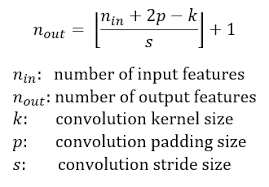

How Pooling layer work:


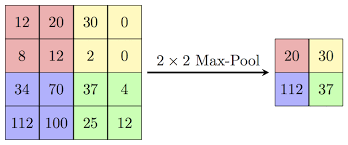

ZeroPAdding:

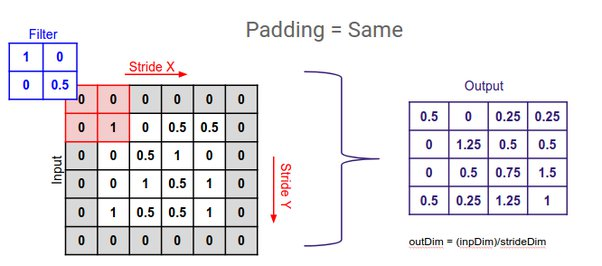

You can see the dimensonality of images is decreased through model.summary() function

In [ ]:
model.build((None,30,30,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 32, 32, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train,y_train,epochs=15,batch_size=64,validation_data=(X_test,y_test),callbacks=[early_stop,model_checkpoint_callback])

Epoch 1/15
491/491 [==============================] - 15s 10ms/step - loss: 1.4094 - accuracy: 0.6059 - val_loss: 0.1207 - val_accuracy: 0.9635
Epoch 2/15
491/491 [==============================] - 4s 8ms/step - loss: 0.1469 - accuracy: 0.9563 - val_loss: 0.0264 - val_accuracy: 0.9916
Epoch 3/15
491/491 [==============================] - 4s 8ms/step - loss: 0.0738 - accuracy: 0.9772 - val_loss: 0.0311 - val_accuracy: 0.9907
Epoch 4/15
491/491 [==============================] - 4s 9ms/step - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0142 - val_accuracy: 0.9960
Epoch 5/15
491/491 [==============================] - 4s 8ms/step - loss: 0.0402 - accuracy: 0.9879 - val_loss: 0.0238 - val_accuracy: 0.9922
Epoch 6/15
491/491 [==============================] - 4s 9ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0144 - val_accuracy: 0.9953
Epoch 7/15
491/491 [==============================] - 4s 8ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0141 - val_accuracy: 0.9954
Epoc

##Checking Accuracy and Save Model

In [ ]:
df_metrics= pd.DataFrame(history.history)

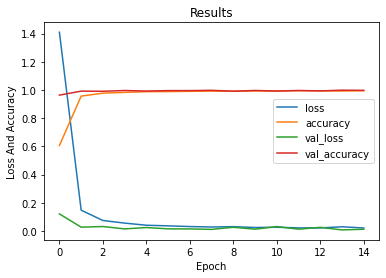

In [ ]:
ax = df_metrics.plot(title='Results')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss And Accuracy");

In [ ]:
model.save('traffic_classifier.h5')

## Evaluate model on Test data

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd 

In [ ]:
df = pd.read_csv('Test.csv')
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
y_test = df['ClassId'].values
images = df['Path'].values
test_data = []

In [ ]:
for image in images:
  img = Image.open(f'{image}')
  img = img.resize((30,30))
  img = np.array(img)
  test_data.append(img)
X_test = np.array(test_data)
y_hat = model.predict(X_test)

In [ ]:
print(y_hat.shape,y_test.shape)

(12630, 43) (12630,)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print('Accuracy_score:',accuracy_score(y_test,np.argmax(y_hat, axis=1)))

Accuracy_score: 0.9738717339667459


It's good with Accuracy more than 97%

In [ ]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
def show_images(images,path, figsize=(20,15), columns = 5):
  plt.figure(figsize=figsize)
  for i, image in enumerate(images):
      plt.subplot(len(images) / columns + 1, columns, i + 1)
      img = Image.open(f'{path}/{image}')
      img = img.resize((30,30))
      img = np.array(img)
      img = np.expand_dims(img, axis=0)

      predict = model.predict(img)
      result = int(np.argmax(predict, axis=1)+1)
      plt.xlabel(str(classes[result]),fontsize=18)
      plt.imshow(mpimg.imread(f'{path}/{image}'));



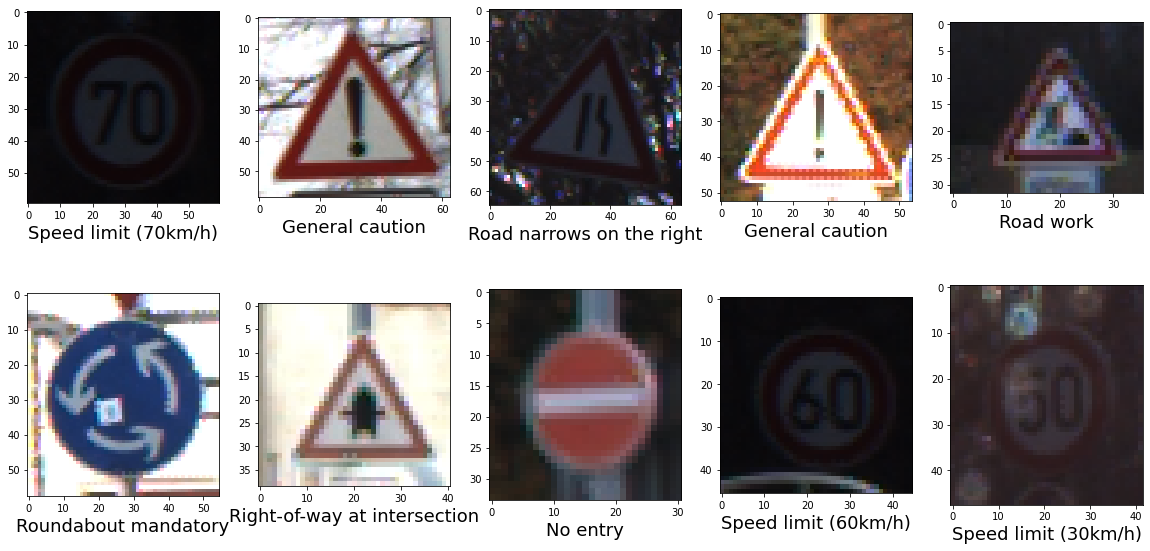

In [ ]:
images = os.listdir('/content/Test')
show_images(images[:10],'/content/Test')